<a href="https://colab.research.google.com/github/carolinalibarino/Python/blob/main/Python_aula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados Simples - Inscrições do Curso

### Após a Aula introdutória vamos ver como colher algumas informações Simples Usando Python

In [ ]:
import pandas as pd #Biblioteca responsável para fazer a leitura e impressão de bases de dados

### Veja neste link como armazenar uma planilha excel no Github para usar como base de dados no COLAB

In [ ]:
url = 'https://github.com/profcintiapinho/laboratorio_ia/blob/main/respostasalunos.xlsx?raw=true' #pega o caminho do arquivo excel no github
planilha = "respostas" #identifica a planilha que está os dados
base = pd.read_excel(url,planilha) #pega o caminho e a planilha exata e armazena na variável

In [ ]:
base

,Turma,interesse,computador,motivacao
0,Novo Tec - Administração(Tarde),Noite,Sim,Quero estar mais liga e aprender muito mais s...
1,Contabilidade - Noite,Tarde,Sim,conseguir automatizar alguns processos no meu ...
2,Contabilidade - Noite,Tarde,Sim,"Obter um pouco de conhecimento nessa área, a q..."
3,Novo Tec - Recursos Humanos (Manhã),Noite,Sim,Porque o python é uma linguagens de programaçã...
4,Contabilidade - Noite,Tarde,Sim,quero aprimorar meus conhecimentos
...,...,...,...,...
56,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...
57,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...
58,Novo Tec - Informática (Manhã),Tarde,Sim,Busca por conhecimentos que possam agregar na ...
59,Novo Tec - Informática (Manhã),Noite,Sim,Ampliar meus conhecimentos na área de informática


In [ ]:
import matplotlib.pyplot as plt #biblioteca para gerar gráficos
import seaborn as sns #biblioteca para visualizar gráficos

<Axes: title={'center': 'Qual o curso dos alunos?'}, xlabel='Turma', ylabel='count'>

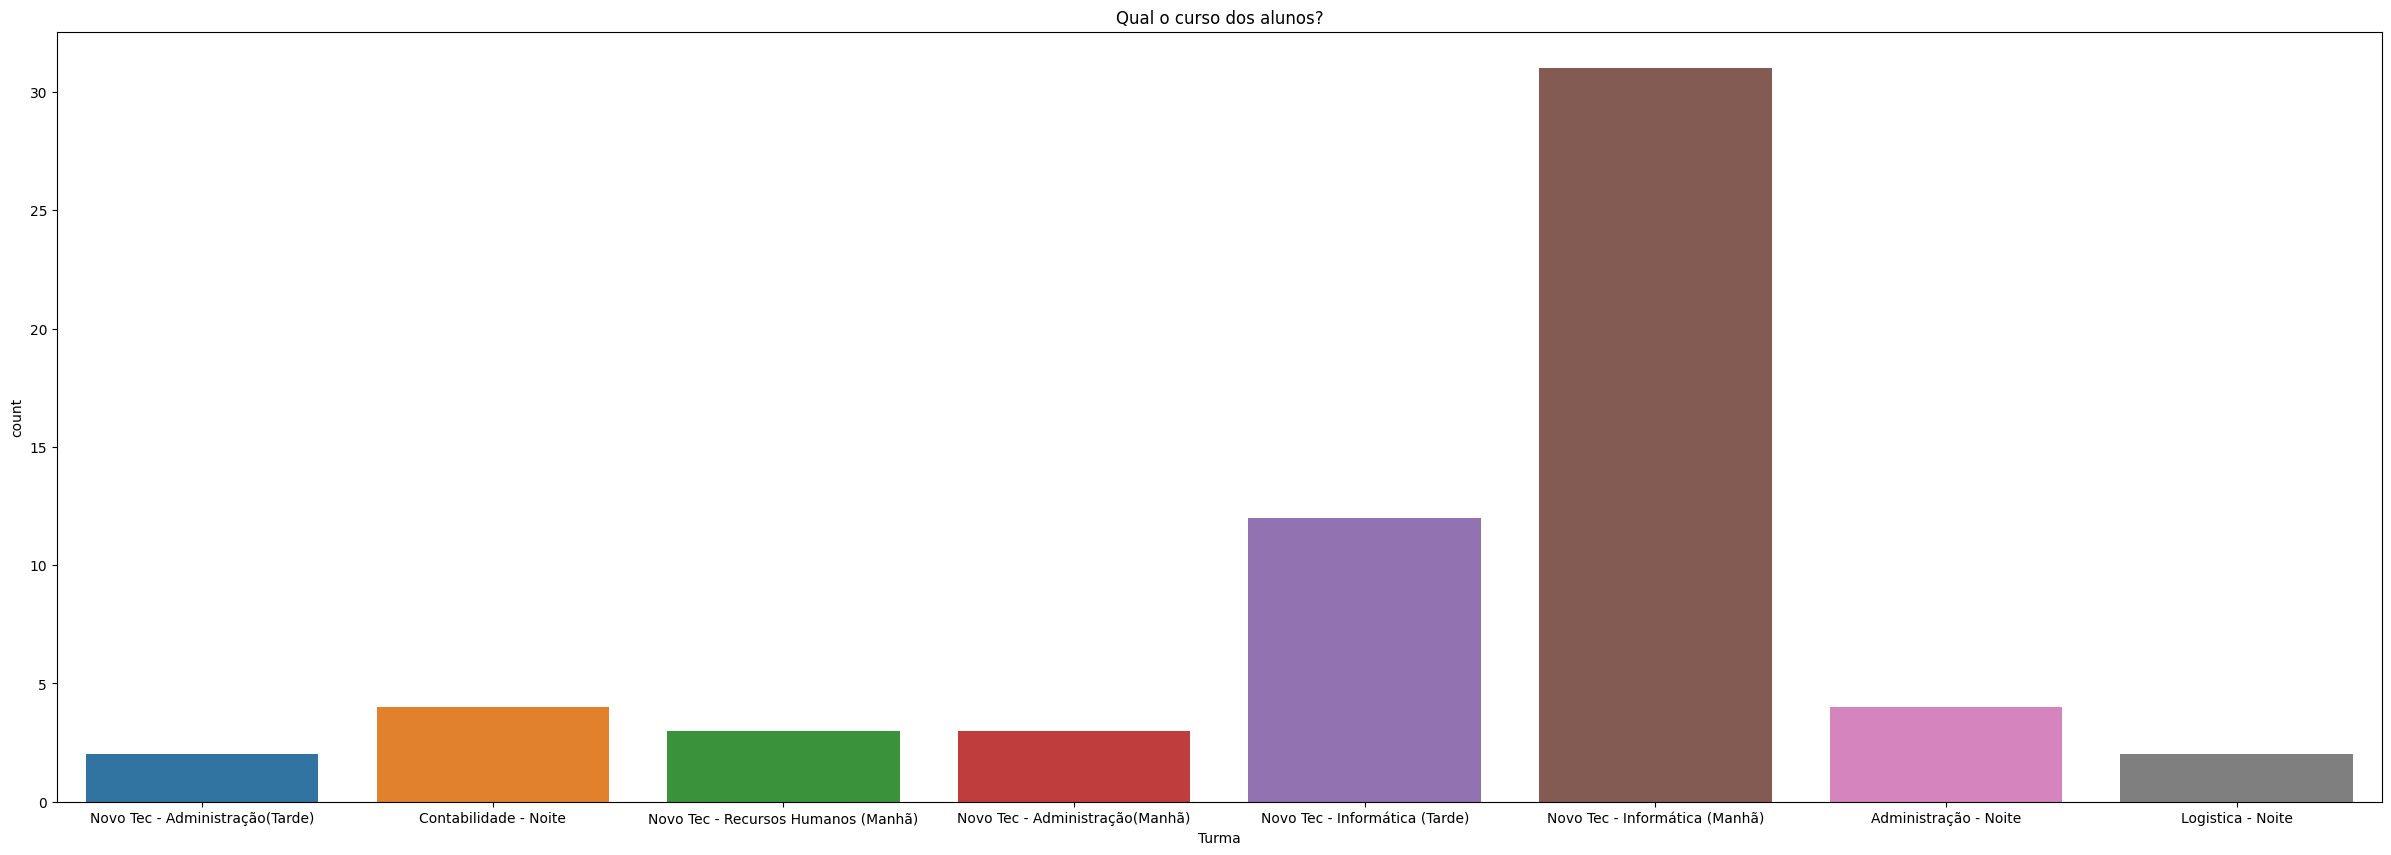

In [ ]:
plt.subplots(figsize=(30, 10))
plt.title('Qual o curso dos alunos?')
sns.countplot(x=base["Turma"])

Text(0.5, 1.0, 'Alunos possuem computadores?')

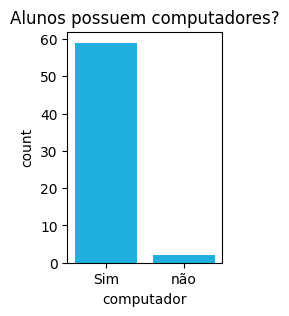

In [ ]:
plt.subplots(figsize=(2,3))
sns.countplot(x=base['computador'], color='#00BFFF')
plt.title('Alunos possuem computadores?')

In [ ]:
base['interesse'].value_counts()

Tarde    31
Noite    30
Name: interesse, dtype: int64

In [ ]:
tarde = base.interesse.value_counts()['Tarde']
noite = base.interesse.value_counts()['Noite']

In [ ]:
x = ["Tarde", "Noite"]
y = [tarde, noite]

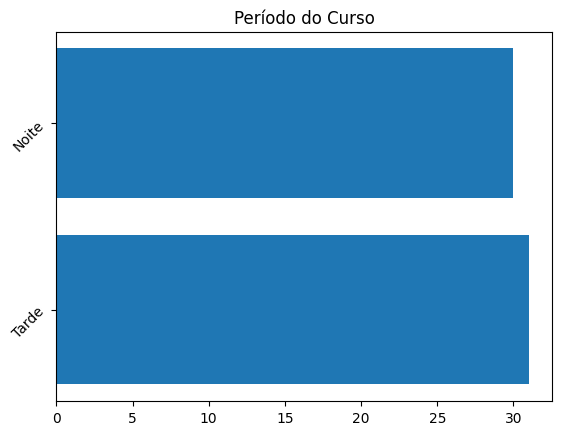

In [ ]:
plt.barh(x, y)
plt.yticks(rotation=45)
plt.title('Período do Curso')
plt.show()

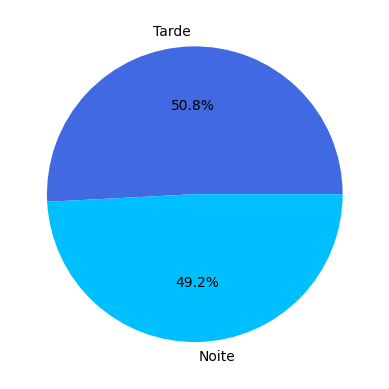

In [ ]:
cores = ['#4169E1','#00BFFF','#00008B']
plt.pie(y, labels=x, autopct='%1.1f%%', colors = cores)
plt.show()

In [ ]:
import spacy
import re

In [ ]:
!python -m spacy download pt_core_news_sm

2023-09-01 11:59:23.036452: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 36.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [ ]:
pln = spacy.load('pt_core_news_sm')

In [ ]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [ ]:
#qauntidade e palavras dentro de stop words
len(stop_words)

417

stop words: são palavras da lingua portuguesa que não trazem sentido ao texto, apenas ligam as palavras. Como por exemplo artigos, preposições, pronomes e etc

In [ ]:
"possui" in stop_words

True

In [ ]:
pln.Defaults.stop_words.add("possui")

In [ ]:
import string
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def preprocessamento(text):
    result = []
    pos_tag = ['ADJ', 'NOUN', 'VERB', 'PROPN'] # escolhendo apenas adjetivos, substantivos e verbos , 'VERB'
    texto = re.sub(u'[^a-zA-Z0-9áéíóúÁÉÍÓÚâêîôÂÊÎÔãõÃÕçÇ: ]', '', text )
    doc = pln(texto.lower()) # Transformando em minúsculo
    for token in doc:
        # 3
        if(token.text in stop_words or token.text in pontuacoes):
            continue
        # 4
        if(token.pos_ in pos_tag):
            result.append(token.text)

        texto = ' '.join([str(elemento) for elemento in result if not elemento.isdigit()])


    #return result # 5
    return texto # 5

In [ ]:
base.motivacao=base.motivacao.astype(str)
base['limpa'] = base['motivacao'].apply(preprocessamento)

In [ ]:
base

,Turma,interesse,computador,motivacao,limpa
0,Novo Tec - Administração(Tarde),Noite,Sim,Quero estar mais liga e aprender muito mais s...,liga aprender tecnologia
1,Contabilidade - Noite,Tarde,Sim,conseguir automatizar alguns processos no meu ...,conseguir automatizar processos trabalho
2,Contabilidade - Noite,Tarde,Sim,"Obter um pouco de conhecimento nessa área, a q...",obter conhecimento solicitado mercado trabalho
3,Novo Tec - Recursos Humanos (Manhã),Noite,Sim,Porque o python é uma linguagens de programaçã...,python linguagens programação fácil executar p...
4,Contabilidade - Noite,Tarde,Sim,quero aprimorar meus conhecimentos,aprimorar conhecimentos
...,...,...,...,...,...
56,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...,curso extracurricular melhorar currículo
57,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...,curso extracurricular melhorar currículo
58,Novo Tec - Informática (Manhã),Tarde,Sim,Busca por conhecimentos que possam agregar na ...,busca conhecimentos possam agregar vida
59,Novo Tec - Informática (Manhã),Noite,Sim,Ampliar meus conhecimentos na área de informática,ampliar conhecimentos informática


In [ ]:
motivo = base['limpa'].values
juntandotudo = ''
for sentimento in motivo:
  juntandotudo += sentimento+" "

In [ ]:
motivo = base['limpa'].values
taylorswift = ''
for sentimento in motivo:
  taylorswift += sentimento+" "

In [ ]:
juntandotudo

'liga aprender tecnologia conseguir automatizar processos trabalho obter conhecimento solicitado mercado trabalho python linguagens programação fácil executar projetos tamanhos sabendo python aprimorar conhecimentos aprimorar conhecimentos venho interessando tecnologia conhecimento adquirir conhecimentos agregar conhecimentos currículo achei interessante curso melhorar conhecimento python interessei gosto programação estudei python conhecimento indicação documentário coded bias desenvolvi interesse expandir conhecimentos futuro melhor incrementar currículo interesse interesse explorar áreas informática estudei python motivos conhecer mexe funciona adquirir conhecimento busco melhor capacitação ingressar mercado trabalho interesse tema curso gosto aprender coisas acredito oportunidade aparece agarrada tema curso desperta interesse experiência area interesse aprender tecnologias atuais ampliar conhecimento amo áreae decidindo aprender fundamental aprender coisas tornar profissional quali

In [ ]:
taylorswift
Taylor Alison Swift (Reading, 13 de dezembro de 1989) é uma cantora, compositora, atriz, diretora e roteirista norte-americana. Suas composições narrativas, muitas vezes inspirada pelas suas experiências pessoais, tem recebido ampla cobertura mediática e elogios críticos. Swift mudou-se para Nashville aos 14 anos de idade para se tornar uma cantora de música country, assinando um contrato de composição com a Sony/ATV Music Publishing em 2004 e um contrato de gravação com a Big Machine Records em 2005.

Seu álbum de estreia autointitulado de 2006 se tornou o álbum mais longo dos anos 2000 a permanecer na parada de música da Billboard, a Billboard 200. Seu terceiro single, "Our Song", fez dela a cantora e compositora mais jovem a alcançar o número um na Billboard Hot Country Songs. O segundo álbum de estúdio de Swift, Fearless (2008), ganhou quatro prêmios Grammy e produziu os single "Love Story" e "You Belong with Me". Tornou-se o álbum mais vendido de 2009 nos Estados Unidos e foi certificado com disco de platina pela RIAA. O terceiro álbum auto-escrito de Swift, Speak Now (2010), gerou o single vencedor do Grammy "Mean", o álbum recebeu muitas avaliações positivas por parte da crítica musical, registrando uma média de 77 pontos de aprovação no agregador de resenhas Metacritic. Seu quarto álbum de estúdio, Red (2012), deu a ela seu primeiro single número um na Billboard Hot 100, "We Are Never Ever Getting Back Together". Em seu primeiro dia de vendas, assumiu a liderança da iTunes Store de diversos países, inclusive a do Brasil. Seu quinto álbum de estúdio e seu primeiro projeto totalmente pop, 1989 (2014), lançou os singles número um, na Billboard Hot 100, "Shake It Off", "Blank Space" e "Bad Blood", e ganhou três prêmios Grammy - incluindo o de Álbum do Ano - tornando Swift a primeira mulher a ter sucesso no primeiro lugar no Hot 100 e a primeira mulher a ganhar o Álbum do Ano duas vezes como artista principal. Seu sexto álbum de estúdio, com influências de hip hop, Reputation (2017), fez dela a primeira e única artista na história da música a ter quatro álbuns vendendo mais de um milhão de cópias em sua primeira semana nos EUA e gerou seu quinto single número um do Hot 100, "Look What You Made Me Do". Seu sétimo álbum de estúdio, Lover (2019), bateu o recorde das entradas simultâneas do Hot 100 por uma artista feminina e se tornou o álbum de estúdio mais vendido em 2019. Lover e seus singles receberam três indicações no Grammy Awards de 2020, incluindo Melhor Álbum Vocal Pop, sendo esta a terceira indicação consecutiva da cantora na categoria, após 1989 e Reputation. Um dia antes do lançamento, Taylor anunciou seu oitavo álbum de estúdio, Folklore (2020), que se tornou, de acordo com o Guinness World Records, o álbum por uma artista feminina com mais reproduções em seu primeiro dia no Spotify, e três das suas faixas atingiram o top 10 das tabelas oficiais em oito países. Evermore, nono álbum de estúdio da cantora, foi lançado em 11 de dezembro de 2020, pela Republic Records, poucos meses após o lançamento do oitavo álbum. Todas as 15 faixas do álbum entraram na parada Billboard Hot 100 na mesma semana, lideradas pelo primeiro single, "Willow", mais de um milhão de cópias de Evermore foram vendidas globalmente em sua primeira semana.

Tendo vendido mais de 50 milhões de álbuns e 150 milhões de singles mundialmente, Swift é um das artistas de música mais vendidos no mundo de todos os tempos. Seus prêmios incluem 10 Grammy Awards, um Emmy Award e sete recordes no Guinness World Records; ela é a artista e mulher mais premiada no American Music Awards (29 vitórias) e no Billboard Music Awards (23 vitórias), respectivamente. Ela foi incluída em vários rankings, como a lista anual da revista Time das 100 pessoas mais influentes do mundo (2010, 2015 e 2019), os 100 maiores compositores de todos os tempos da revista Rolling Stone (2015), a Forbes Celebrity 100 (primeira colocada em 2016 e 2019), o Melhor Artista de Charts de Todos os Tempos da revista Billboard (em oitavo lugar). Ela foi nomeada Artista de Gravação Global do Ano duas vezes pela Federação Internacional da Indústria Fonográfica (IFPI) (2014 e 2019), Mulher da Década (2010s) pela revista Billboard e Artista da Década (2010s) pelo American Music Awards.

SyntaxError: ignored

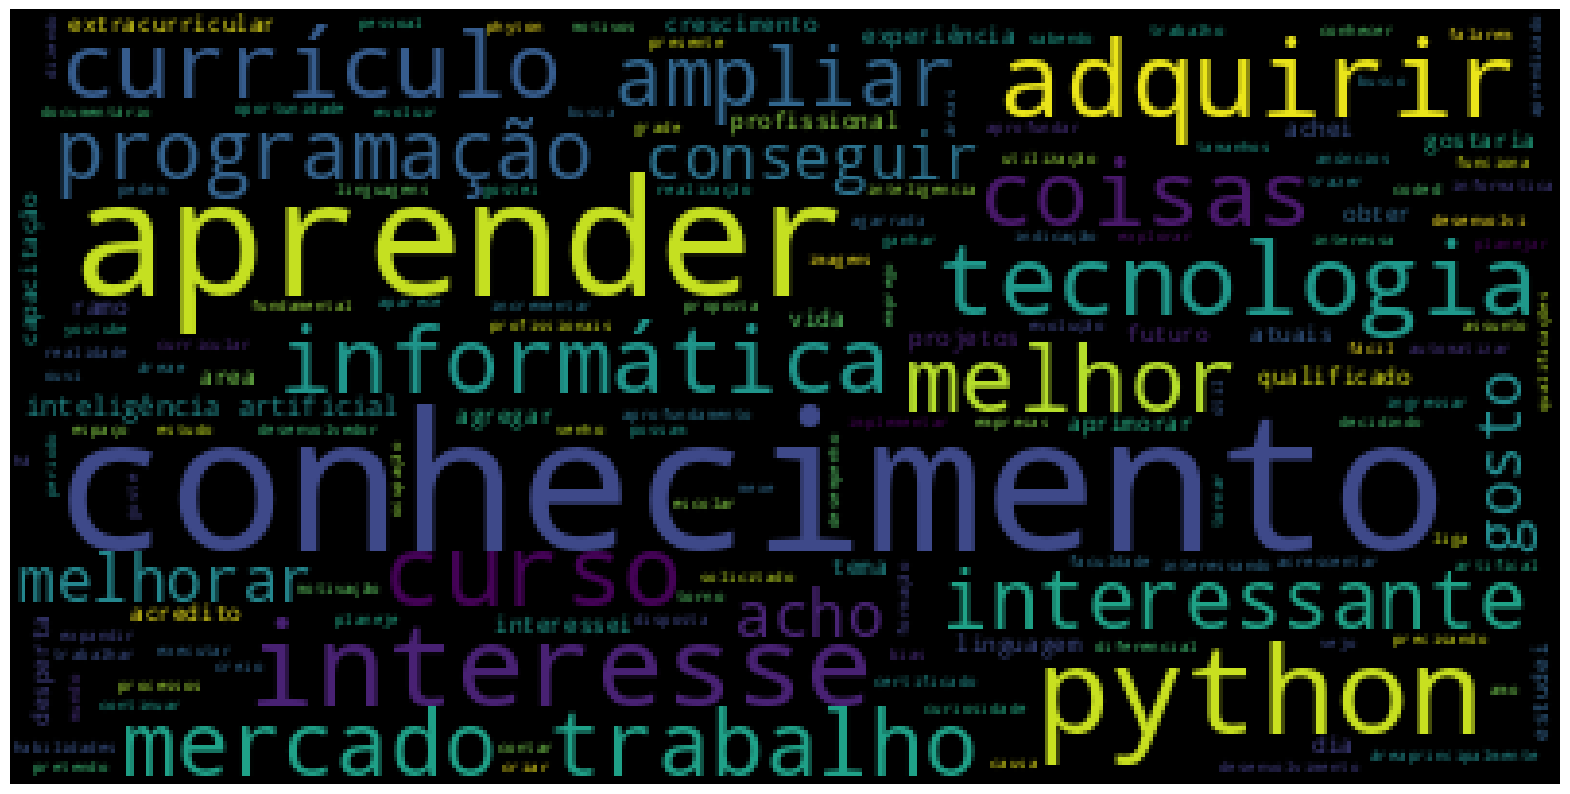

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(WordCloud().generate(taylorswift))